In [ ]:
#pip install basemap

In [1]:
# Dependancies
import pandas as pd
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [3]:
# Step 1: Load the data into a DataFrame
data = {
    'State': [
        'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 
        'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 
        'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 
        'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 
        'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 
        'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 
        'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
    ],
    'Percentage Worked From Home 2022': [
        4.43, 8.06, 14.26, 6.75, 13.63, 16.49, 12.61, 11.64, 25.03, 11.94, 12.26, 7.99, 10.83, 12.10, 8.20, 9.28, 
        9.53, 7.95, 6.23, 12.34, 14.67, 14.64, 10.22, 13.65, 4.51, 9.93, 10.63, 8.89, 8.99, 13.13, 13.06, 9.59, 
        11.59, 12.39, 6.31, 9.81, 7.41, 14.95, 11.84, 4.85, 9.61, 8.51, 8.53, 9.69, 11.00, 14.07, 13.24, 13.96, 
        15.45, 6.87, 10.10, 7.70
    ],
    'Latitude': [
        32.806671, 61.370716, 33.729759, 34.969704, 36.116203, 39.059811, 41.597782, 39.318523, 38.9072,
        27.766279, 33.040619, 21.094318, 44.240459, 40.349457, 39.849426, 42.011539, 38.526600, 37.668140,
        31.169546, 44.693947, 39.063946, 42.230171, 43.326618, 45.694454, 32.741646, 38.456085, 46.921925,
        41.125370, 38.313515, 43.452492, 40.298904, 34.840515, 42.165726, 35.630066, 47.528912, 40.388783,
        35.565342, 44.572021, 40.590752, 18.2208, 41.680893, 33.856892, 44.299782, 35.747845, 31.054487,
        40.150032, 44.045876, 37.769337, 47.400902, 38.491226, 44.268543, 42.755966
    ],
    'Longitude': [
        -86.791130, -152.404419, -111.431221, -92.373123, -119.681564, -105.311104, -72.755371, -75.507141, -77.0369,
        -81.686783, -83.643074, -157.498337, -114.478828, -88.986137, -86.258278, -93.210526, -96.726486, -84.670067,
        -91.867805, -69.381927, -76.802101, -71.530106, -84.536095, -93.900192, -89.678696, -92.288368, -110.454353,
        -98.268082, -117.055374, -71.563896, -74.521011, -106.248482, -74.948051, -79.806419, -99.784012, -82.764915,
        -96.928917, -122.070938, -77.209755, -66.5901, -71.511780, -80.945007, -99.438828, -86.692345, -97.563461,
        -111.862434, -72.710686, -78.169968, -121.490494, -80.954456, -89.616508, -107.302490
    ]
}

df = pd.DataFrame(data)
df.head()

,State,Percentage Worked From Home 2022,Latitude,Longitude
0,Alabama,4.43,32.806671,-86.791130
1,Alaska,8.06,61.370716,-152.404419
2,Arizona,14.26,33.729759,-111.431221
3,Arkansas,6.75,34.969704,-92.373123
4,California,13.63,36.116203,-119.681564


In [191]:
work_from_home_state_map = df.hvplot.points(
    'Longitude',
    'Latitude',
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    size = 'Percentage Worked From Home 2022',
    scale = 5,
    cmap = 'bokeh',
    color = 'Percentage Worked From Home 2022',
    marker = "1",
    hover_cols = ['State', 'Percentage Worked From Home 2022']
)

work_from_home_state_map

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Percentage Worked From Home 2022,State)

In [147]:
df["Percentage Worked From Home 2022"].max()

25.03

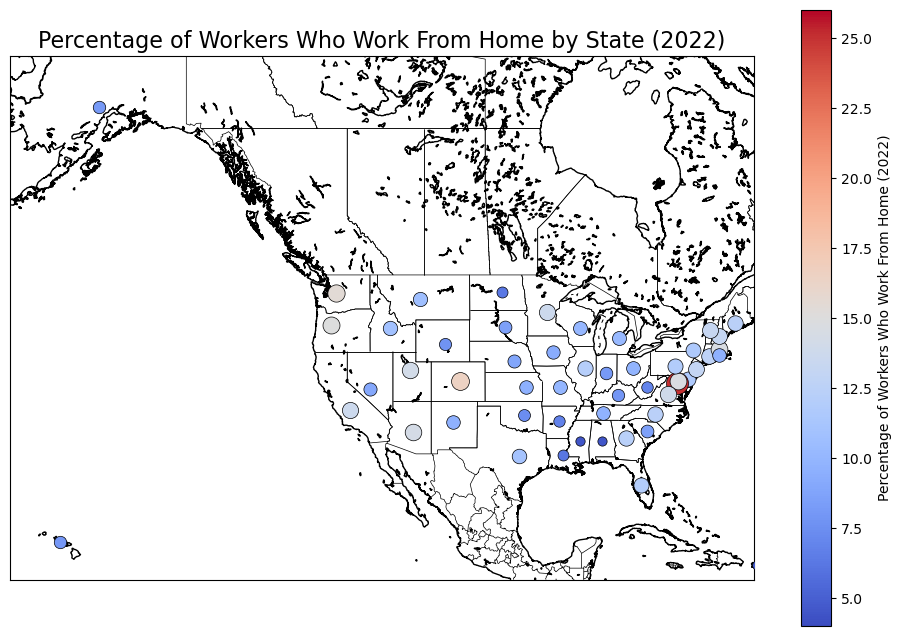

In [163]:
# Step 3: Create the Basemap for the United States
fig, ax = plt.subplots(figsize=(12, 8))
m = Basemap(projection='merc', llcrnrlat=16.396308, urcrnrlat=64.384358, 
            llcrnrlon=-164.0, urcrnrlon=-66.93457, resolution='i', ax=ax)

# Step 4: Draw map details
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Step 5: Plot the data
scatter = None

for index, row in df.iterrows():
    # Convert lat/lon to map projection coordinates
    x, y = m(row["Longitude"], row["Latitude"])
    # Use the percentage for the color and size of the marker
    scatter = m.scatter(x, y, c=row['Percentage Worked From Home 2022'], s=row['Percentage Worked From Home 2022']*10, cmap='coolwarm', vmin=4, vmax=26, edgecolors='black', linewidths=0.5, zorder=5,)
# Step 6: Add a colorbar
plt.colorbar(scatter, label='Percentage of Workers Who Work From Home (2022)')

# Step 7: Title and display the map
plt.title('Percentage of Workers Who Work From Home by State (2022)', fontsize=16)
plt.show()


In [43]:
len(data["Longitude"])

53

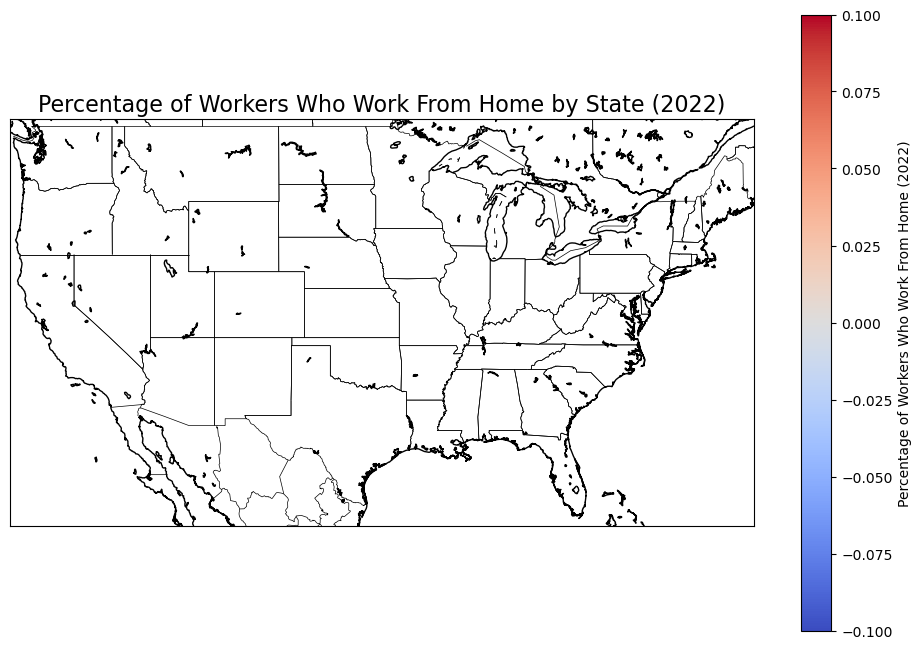

In [11]:
# Step 1: Load the data into a DataFrame
data = {
    'State': [
        'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 
        'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 
        'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 
        'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 
        'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 
        'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 
        'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
    ],
    'Percentage_Worked_From_Home_2022': [
        4.43, 8.06, 14.26, 6.75, 13.63, 16.49, 12.61, 11.64, 25.03, 11.94, 12.26, 7.99, 10.83, 12.10, 8.20, 9.28, 
        9.53, 7.95, 6.23, 12.34, 14.67, 14.64, 10.22, 13.65, 4.51, 9.93, 10.63, 8.89, 8.99, 13.13, 13.06, 9.59, 
        11.59, 12.39, 6.31, 9.81, 7.41, 14.95, 11.84, 4.85, 9.61, 8.51, 8.53, 9.69, 11.00, 14.07, 13.24, 13.96, 
        15.45, 6.87, 10.10, 7.70
    ]
}

df = pd.DataFrame(data)

# Step 2: Define state centroids (latitude, longitude)
state_centroids = {
    "Alabama": (32.806671, -86.791130), "Alaska": (61.370716, -152.404419), "Arizona": (33.729759, -111.431221),
    "Arkansas": (34.969704, -92.373123), "California": (36.116203, -119.681564), "Colorado": (39.059811, -105.311104),
    "Connecticut": (41.597782, -72.755371), "Delaware": (39.318523, -75.507141), "District of Columbia": (38.9072, -77.0369),
    "Florida": (27.766279, -81.686783), "Georgia": (33.040619, -83.643074), "Hawaii": (21.094318, -157.498337),
    "Idaho": (44.240459, -114.478828), "Illinois": (40.349457, -88.986137), "Indiana": (39.849426, -86.258278),
    "Iowa": (42.011539, -93.210526), "Kansas": (38.526600, -96.726486), "Kentucky": (37.668140, -84.670067),
    "Louisiana": (31.169546, -91.867805), "Maine": (44.693947, -69.381927), "Maryland": (39.063946, -76.802101),
    "Massachusetts": (42.230171, -71.530106), "Michigan": (43.326618, -84.536095), "Minnesota": (45.694454, -93.900192),
    "Mississippi": (32.741646, -89.678696), "Missouri": (38.456085, -92.288368), "Montana": (46.921925, -110.454353),
    "Nebraska": (41.125370, -98.268082), "Nevada": (38.313515, -117.055374), "New Hampshire": (43.452492, -71.563896),
    "New Jersey": (40.298904, -74.521011), "New Mexico": (34.840515, -106.248482), "New York": (42.165726, -74.948051),
    "North Carolina": (35.630066, -79.806419), "North Dakota": (47.528912, -99.784012), "Ohio": (40.388783, -82.764915),
    "Oklahoma": (35.565342, -96.928917), "Oregon": (44.572021, -122.070938), "Pennsylvania": (40.590752, -77.209755),
    "Puerto Rico": (18.2208, -66.5901), "Rhode Island": (41.680893, -71.511780), "South Carolina": (33.856892, -80.945007),
    "South Dakota": (44.299782, -99.438828), "Tennessee": (35.747845, -86.692345), "Texas": (31.054487, -97.563461),
    "Utah": (40.150032, -111.862434), "Vermont": (44.045876, -72.710686), "Virginia": (37.769337, -78.169968),
    "Washington": (47.400902, -121.490494), "West Virginia": (38.491226, -80.954456), "Wisconsin": (44.268543, -89.616508),
    "Wyoming": (42.755966, -107.302490)
}

# Step 3: Create the Basemap for the United States
fig, ax = plt.subplots(figsize=(12, 8))
m = Basemap(projection='merc', llcrnrlat=24.396308, urcrnrlat=49.384358, 
            llcrnrlon=-125.0, urcrnrlon=-66.93457, resolution='i', ax=ax)

# Step 4: Draw map details
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Step 5: Plot the data
scatter = None

for state, coords in state_centroids.items():
    #print(f"State:{state}, coords: {x},{y}")
    (lon, lat) = coords
    # Convert lat/lon to map projection coordinates
    x, y = m(lon, lat)
    
    # Check if the state is in the DataFrame and get the percentage of workers working from home in 2022
    if state in df['State'].values:
        percentage = df[df['State'] == state]['Percentage_Worked_From_Home_2022'].values[0]
        #print(f"now printing {state}, percentage:{percentage},coords: {x},{y}")
    else:
        # If the state is not in the DataFrame, set percentage to 0
        print(f"didn't find{state}")
        percentage = 0  
    
    # Use the percentage for the color and size of the marker
    scatter = m.scatter(x, y, c=percentage, s=100, cmap='coolwarm', edgecolors='black', linewidths=0.5, zorder=5)

# Step 6: Add a colorbar
if scatter:
    plt.colorbar(scatter, label='Percentage of Workers Who Work From Home (2022)')

# Step 7: Title and display the map
plt.title('Percentage of Workers Who Work From Home by State (2022)', fontsize=16)
plt.show()
